# Question 3 and Question 4

In [28]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891).data.original

## **Question 3:** 
How is Body Mass Index (BMI) associated with diabetes prevalence, and does this relationship vary across demographic groups?


#### Analysis

In [12]:
# BMI statistics by diabetes status
print("BMI Statistics by Diabetes Status:")
print("="*60)
bmi_stats = cdc_diabetes_health_indicators.groupby('Diabetes_binary')['BMI'].describe()
print(bmi_stats)

print("\n" + "="*60)
print("\nMean BMI:")
print(f"Without Diabetes (0): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==0]['BMI'].mean():.2f}")
print(f"With Diabetes (1): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==1]['BMI'].mean():.2f}")

print("\n" + "="*60)
print("\nMedian BMI:")
print(f"Without Diabetes (0): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==0]['BMI'].median():.2f}")
print(f"With Diabetes (1): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==1]['BMI'].median():.2f}")

BMI Statistics by Diabetes Status:
                    count       mean       std   min   25%   50%   75%   max
Diabetes_binary                                                             
0                218334.0  27.805770  6.291414  12.0  24.0  27.0  31.0  98.0
1                 35346.0  31.944011  7.363401  13.0  27.0  31.0  35.0  98.0


Mean BMI:
Without Diabetes (0): 27.81
With Diabetes (1): 31.94


Median BMI:
Without Diabetes (0): 27.00
With Diabetes (1): 31.00


In [13]:
df = cdc_diabetes_health_indicators.copy(deep=True)

In [14]:
# Categorize BMI into standard categories
# BMI Categories: Underweight (<18.5), Normal (18.5-24.9), Overweight (25-29.9), Obese (>=30)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

print("BMI Category Distribution by Diabetes Status:")
print("="*60)
bmi_diabetes_crosstab = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], margins=True)
print(bmi_diabetes_crosstab)

print("\n" + "="*60)
print("\nPercentage Distribution (by row):")
bmi_diabetes_pct = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], normalize='index') * 100
print(bmi_diabetes_pct.round(2))

BMI Category Distribution by Diabetes Status:
Diabetes_binary       0      1     All
BMI_Category                          
Normal            65025   3928   68953
Obese             67294  20557   87851
Overweight        83057  10692   93749
Underweight        2958    169    3127
All              218334  35346  253680


Percentage Distribution (by row):
Diabetes_binary     0     1
BMI_Category               
Normal           94.3   5.7
Obese            76.6  23.4
Overweight       88.6  11.4
Underweight      94.6   5.4


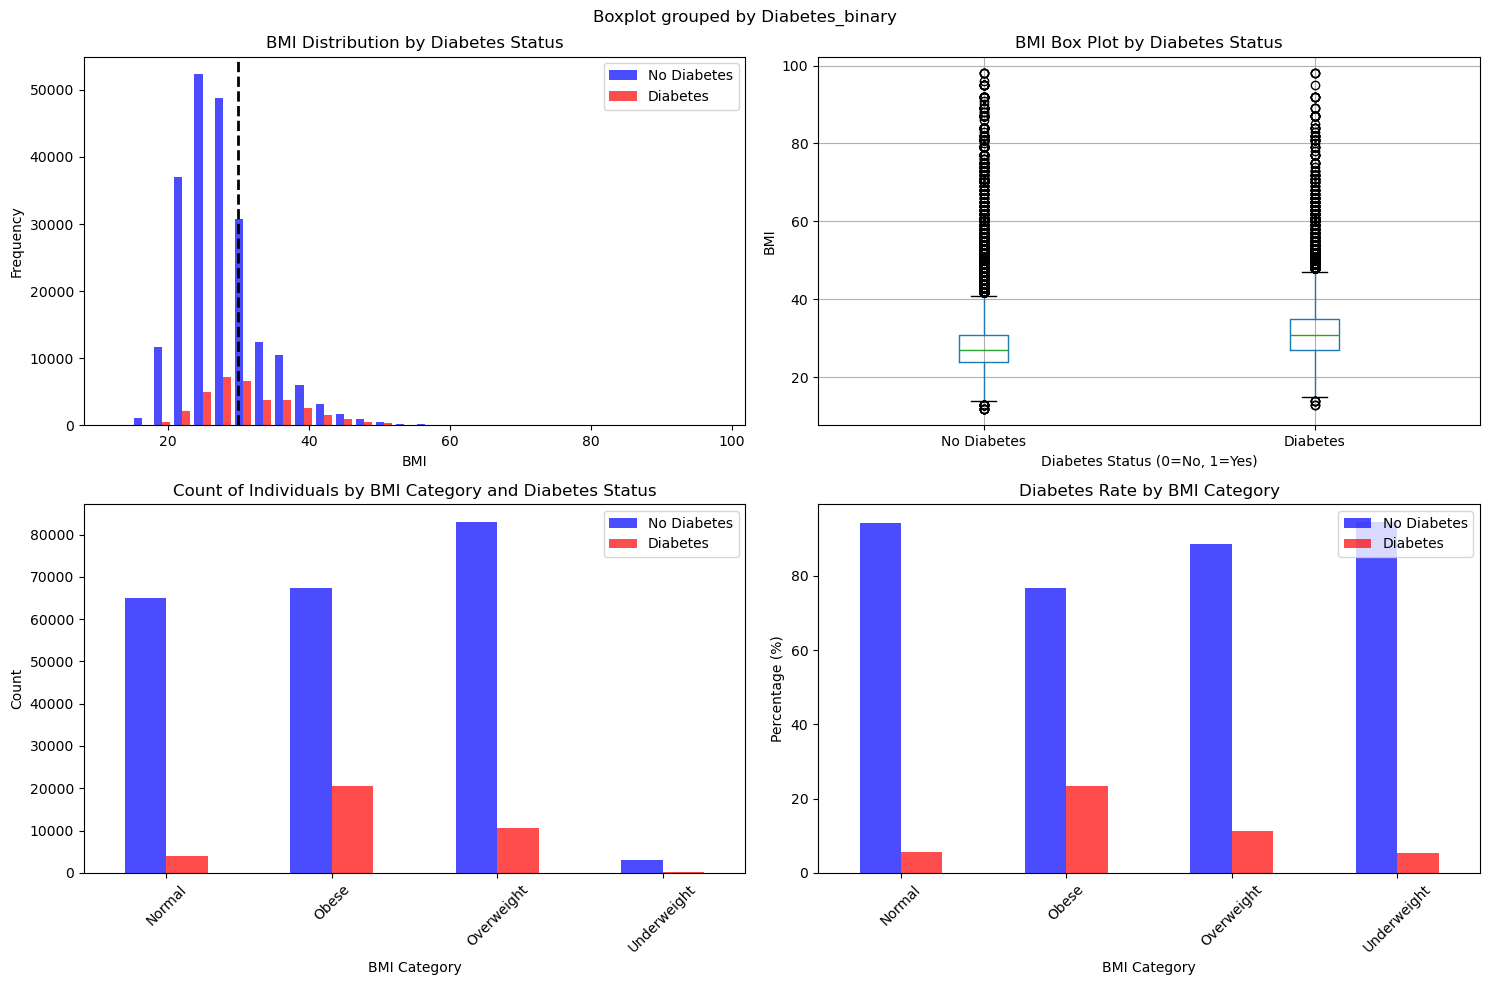

In [15]:
# Visualization: BMI Distribution by Diabetes Status
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist([df[df['Diabetes_binary']==0]['BMI'], 
                  df[df['Diabetes_binary']==1]['BMI']], 
                 bins=30, label=['No Diabetes', 'Diabetes'], 
                 alpha=0.7, color=['blue', 'red'])
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('BMI Distribution by Diabetes Status')
axes[0, 0].legend()
axes[0, 0].axvline(x=30, color='black', linestyle='--', linewidth=2, label='Obese threshold (BMI=30)')

# Box plot
df.boxplot(column='BMI', by='Diabetes_binary', ax=axes[0, 1])
axes[0, 1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[0, 1].set_ylabel('BMI')
axes[0, 1].set_title('BMI Box Plot by Diabetes Status')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['No Diabetes', 'Diabetes'])

# Bar chart - BMI Categories
bmi_cat_counts = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'])
bmi_cat_counts.plot(kind='bar', ax=axes[1, 0], color=['blue', 'red'], alpha=0.7)
axes[1, 0].set_xlabel('BMI Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Count of Individuals by BMI Category and Diabetes Status')
axes[1, 0].legend(['No Diabetes', 'Diabetes'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Percentage bar chart
bmi_diabetes_pct_plot = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], normalize='index') * 100
bmi_diabetes_pct_plot.plot(kind='bar', stacked=False, ax=axes[1, 1], color=['blue', 'red'], alpha=0.7)
axes[1, 1].set_xlabel('BMI Category')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Diabetes Rate by BMI Category')
axes[1, 1].legend(['No Diabetes', 'Diabetes'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Answer the specific question: percentage of obese individuals (BMI > 30) with diabetes
obese_individuals = df[df['BMI'] >= 30]
obese_with_diabetes = obese_individuals[obese_individuals['Diabetes_binary'] == 1]

total_obese = len(obese_individuals)
obese_diabetic = len(obese_with_diabetes)
percentage_obese_diabetic = (obese_diabetic / total_obese) * 100

print(f"Total number of obese individuals (BMI >= 30): {total_obese:,}")
print(f"Obese individuals with diabetes: {obese_diabetic:,}")
print(f"Percentage of obese individuals with diabetes: {percentage_obese_diabetic:.2f}%")
print("\n" + "="*60)

# Additional insights
print("\nComparative Analysis:")
non_obese = df[df['BMI'] < 30]
non_obese_with_diabetes = non_obese[non_obese['Diabetes_binary'] == 1]
percentage_non_obese_diabetic = (len(non_obese_with_diabetes) / len(non_obese)) * 100

print(f"Percentage of non-obese individuals with diabetes: {percentage_non_obese_diabetic:.2f}%")
print(f"\nObesity increases diabetes risk by a factor of: {percentage_obese_diabetic / percentage_non_obese_diabetic:.2f}x")

Total number of obese individuals (BMI >= 30): 87,851
Obese individuals with diabetes: 20,557
Percentage of obese individuals with diabetes: 23.40%


Comparative Analysis:
Percentage of non-obese individuals with diabetes: 8.92%

Obesity increases diabetes risk by a factor of: 2.62x


#### Statistical Significance Test

Before performing the chi-square test, we establish our statistical framework:

**Hypotheses:**
- **H₀ (Null Hypothesis):** There is no association between BMI category and diabetes status. BMI category and diabetes are independent.
- **H₁ (Alternative Hypothesis):** There is a significant association between BMI category and diabetes status. BMI category and diabetes are not independent.

**Test:** Chi-square test of independence

**Significance Level:** α = 0.05

**Decision Rule:**
- If p-value < 0.05: Reject H₀ (conclude there is a significant association)
- If p-value ≥ 0.05: Fail to reject H₀ (insufficient evidence of association)

**Test Statistic:** χ² (chi-square statistic) measures the difference between observed and expected frequencies under independence assumption.

In [17]:
# Statistical Significance Test: Chi-Square Test for BMI Category and Diabetes
from scipy.stats import chi2_contingency

print("Statistical significance test: bmi category and diabetes")
print("="*60)

# Create contingency table
contingency_table = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'])
print("\nContingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n" + "="*60)
print("\nChi-Square Test Results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")
print(f"\nConclusion: The association between BMI category and diabetes is")
print(f"{'Statistically significant' if p_value < 0.05 else 'not statistically significant'} (p < 0.05)")

# Calculate odds ratios for each BMI category compared to Normal weight
print("\n" + "="*60)
print("\nOdds ratios (Reference: Normal Weight):")
print("="*60)

normal_diabetes = contingency_table.loc['Normal', 1]
normal_no_diabetes = contingency_table.loc['Normal', 0]

for category in ['Underweight', 'Overweight', 'Obese']:
    if category in contingency_table.index:
        cat_diabetes = contingency_table.loc[category, 1]
        cat_no_diabetes = contingency_table.loc[category, 0]
        
        # Calculate odds ratio
        odds_cat = cat_diabetes / cat_no_diabetes
        odds_normal = normal_diabetes / normal_no_diabetes
        odds_ratio = odds_cat / odds_normal
        
        print(f"\n{category} vs Normal:")
        print(f"   Odds Ratio: {odds_ratio:.3f}")
        print(f"   Interpretation: {category} individuals have {odds_ratio:.2f}x the odds of having diabetes compared to normal weight individuals")

Statistical significance test: bmi category and diabetes

Contingency Table:
Diabetes_binary      0      1
BMI_Category                 
Normal           65025   3928
Obese            67294  20557
Overweight       83057  10692
Underweight       2958    169


Chi-Square Test Results:
Chi-square statistic: 11155.45
p-value: 0.00e+00
Degrees of freedom: 3

Conclusion: The association between BMI category and diabetes is
Statistically significant (p < 0.05)


Odds ratios (Reference: Normal Weight):

Underweight vs Normal:
   Odds Ratio: 0.946
   Interpretation: Underweight individuals have 0.95x the odds of having diabetes compared to normal weight individuals

Overweight vs Normal:
   Odds Ratio: 2.131
   Interpretation: Overweight individuals have 2.13x the odds of having diabetes compared to normal weight individuals

Obese vs Normal:
   Odds Ratio: 5.057
   Interpretation: Obese individuals have 5.06x the odds of having diabetes compared to normal weight individuals


In [18]:
# Stratified Analysis: BMI and Diabetes by Age Group
print("Stratified analysis: bmi category and diabetes by age group")
print("="*60)

# Define age groups (Age is encoded 1-13, representing age ranges)
# Age categories in the dataset:
# 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49,
# 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80+

def categorize_age(age):
    if age <= 4:  # 18-39
        return 'Young (18-39)'
    elif age <= 8:  # 40-59
        return 'Middle-aged (40-59)'
    else:  # 60+
        return 'Older (60+)'

df['Age_Group'] = df['Age'].apply(categorize_age)

print("\nAge Group Distribution:")
print(df['Age_Group'].value_counts().sort_index())

# Diabetes rate by BMI category within each age group
print("\n" + "="*60)
print("\nDiabetes Rate by BMI Category, Stratified by Age Group:")
print("="*60)

for age_group in ['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']:
    print(f"\n{age_group}:")
    age_df = df[df['Age_Group'] == age_group]
    bmi_diabetes_age = pd.crosstab(age_df['BMI_Category'], age_df['Diabetes_binary'], normalize='index') * 100
    
    if 1 in bmi_diabetes_age.columns:
        for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
            if bmi_cat in bmi_diabetes_age.index:
                rate = bmi_diabetes_age.loc[bmi_cat, 1]
                print(f"   {bmi_cat}: {rate:.2f}% diabetes rate")
    
    # Chi-square test for this age group
    contingency = pd.crosstab(age_df['BMI_Category'], age_df['Diabetes_binary'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"   Chi-square: {chi2:.2f}, p-value: {p_val:.2e}")

Stratified analysis: bmi category and diabetes by age group

Age Group Distribution:
Age_Group
Middle-aged (40-59)     93122
Older (60+)            122314
Young (18-39)           38244
Name: count, dtype: int64


Diabetes Rate by BMI Category, Stratified by Age Group:

Young (18-39):
   Underweight: 1.32% diabetes rate
   Normal: 1.22% diabetes rate
   Overweight: 1.84% diabetes rate
   Obese: 6.25% diabetes rate
   Chi-square: 641.62, p-value: 9.56e-139

Middle-aged (40-59):
   Underweight: 4.00% diabetes rate
   Normal: 3.51% diabetes rate
   Overweight: 7.53% diabetes rate
   Obese: 19.16% diabetes rate
   Chi-square: 4232.24, p-value: 0.00e+00

Older (60+):
   Underweight: 7.77% diabetes rate
   Normal: 9.03% diabetes rate
   Overweight: 16.65% diabetes rate
   Obese: 32.29% diabetes rate
   Chi-square: 6834.32, p-value: 0.00e+00


In [19]:
# Stratified Analysis: BMI and Diabetes by Sex
print("Stratified analysis: bmi category and diabetes by sex")
print("="*60)

# Sex: 0 = Female, 1 = Male
print("\nSex Distribution:")
print(df['Sex'].value_counts())

print("\n" + "="*60)
print("\nDiabetes Rate by BMI Category, Stratified by Sex:")
print("="*60)

for sex, sex_label in [(0, 'Female'), (1, 'Male')]:
    print(f"\n{sex_label}:")
    sex_df = df[df['Sex'] == sex]
    bmi_diabetes_sex = pd.crosstab(sex_df['BMI_Category'], sex_df['Diabetes_binary'], normalize='index') * 100
    
    if 1 in bmi_diabetes_sex.columns:
        for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
            if bmi_cat in bmi_diabetes_sex.index:
                rate = bmi_diabetes_sex.loc[bmi_cat, 1]
                print(f"   {bmi_cat}: {rate:.2f}% diabetes rate")
    
    # Chi-square test for this sex
    contingency = pd.crosstab(sex_df['BMI_Category'], sex_df['Diabetes_binary'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"   Chi-square: {chi2:.2f}, p-value: {p_val:.2e}")

Stratified analysis: bmi category and diabetes by sex

Sex Distribution:
Sex
0    141974
1    111706
Name: count, dtype: int64


Diabetes Rate by BMI Category, Stratified by Sex:

Female:
   Underweight: 4.59% diabetes rate
   Normal: 4.61% diabetes rate
   Overweight: 10.95% diabetes rate
   Obese: 23.35% diabetes rate
   Chi-square: 7623.86, p-value: 0.00e+00

Male:
   Underweight: 8.41% diabetes rate
   Normal: 7.73% diabetes rate
   Overweight: 11.86% diabetes rate
   Obese: 23.46% diabetes rate
   Chi-square: 3617.16, p-value: 0.00e+00


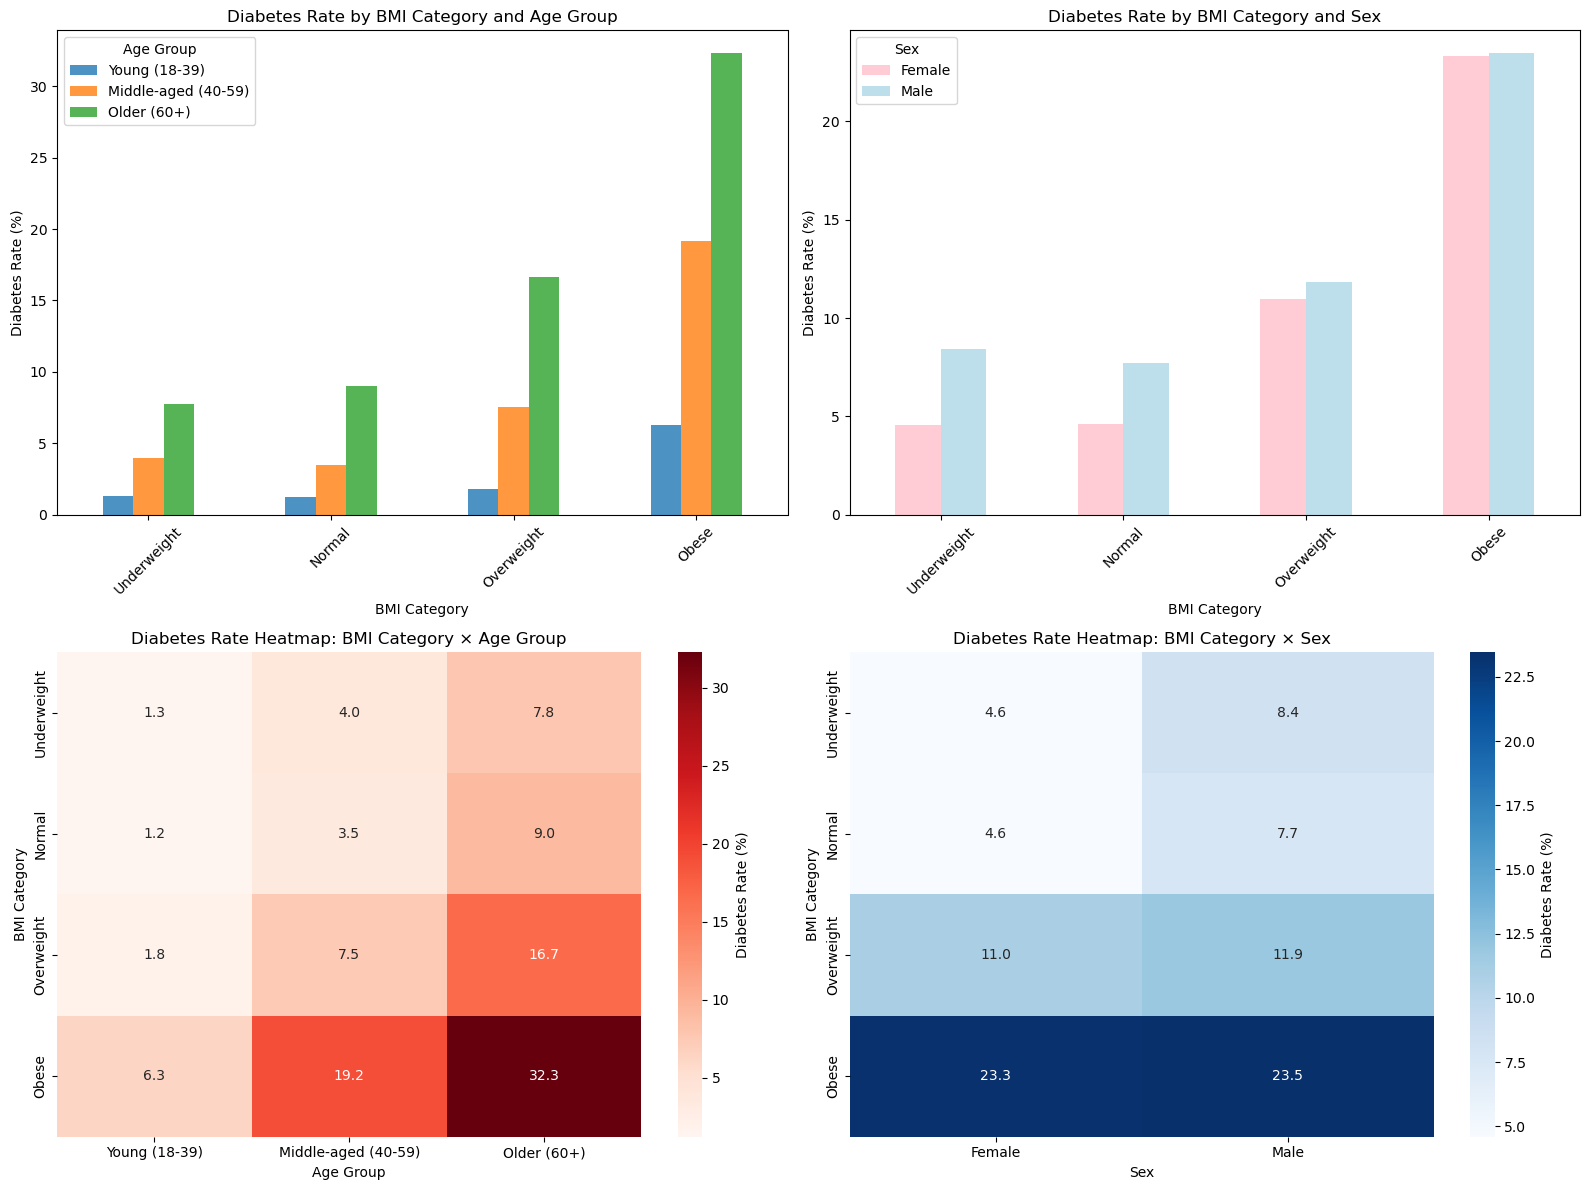

In [20]:
# Visualization: BMI-Diabetes Relationship Stratified by Age and Sex
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Diabetes rate by BMI category across age groups
age_bmi_data = []
for age_group in ['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']:
    age_df = df[df['Age_Group'] == age_group]
    for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
        if bmi_cat in age_df['BMI_Category'].values:
            rate = (age_df[age_df['BMI_Category'] == bmi_cat]['Diabetes_binary'].mean()) * 100
            age_bmi_data.append({'Age Group': age_group, 'BMI Category': bmi_cat, 'Diabetes Rate': rate})

age_bmi_df = pd.DataFrame(age_bmi_data)
age_bmi_pivot = age_bmi_df.pivot(index='BMI Category', columns='Age Group', values='Diabetes Rate')
age_bmi_pivot = age_bmi_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
age_bmi_pivot[['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']].plot(kind='bar', ax=axes[0, 0], alpha=0.8)
axes[0, 0].set_ylabel('Diabetes Rate (%)')
axes[0, 0].set_title('Diabetes Rate by BMI Category and Age Group')
axes[0, 0].legend(title='Age Group')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Diabetes rate by BMI category across sex
sex_bmi_data = []
for sex, sex_label in [(0, 'Female'), (1, 'Male')]:
    sex_df = df[df['Sex'] == sex]
    for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
        if bmi_cat in sex_df['BMI_Category'].values:
            rate = (sex_df[sex_df['BMI_Category'] == bmi_cat]['Diabetes_binary'].mean()) * 100
            sex_bmi_data.append({'Sex': sex_label, 'BMI Category': bmi_cat, 'Diabetes Rate': rate})

sex_bmi_df = pd.DataFrame(sex_bmi_data)
sex_bmi_pivot = sex_bmi_df.pivot(index='BMI Category', columns='Sex', values='Diabetes Rate')
sex_bmi_pivot = sex_bmi_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
sex_bmi_pivot.plot(kind='bar', ax=axes[0, 1], alpha=0.8, color=['pink', 'lightblue'])
axes[0, 1].set_ylabel('Diabetes Rate (%)')
axes[0, 1].set_title('Diabetes Rate by BMI Category and Sex')
axes[0, 1].legend(title='Sex')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Heatmap: Diabetes rate by BMI and Age
heatmap_data = df.groupby(['BMI_Category', 'Age_Group'])['Diabetes_binary'].mean() * 100
heatmap_pivot = heatmap_data.unstack()
heatmap_pivot = heatmap_pivot[['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']]
heatmap_pivot = heatmap_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
sns.heatmap(heatmap_pivot, annot=True, fmt='.1f', cmap='Reds', ax=axes[1, 0], cbar_kws={'label': 'Diabetes Rate (%)'})
axes[1, 0].set_title('Diabetes Rate Heatmap: BMI Category × Age Group')
axes[1, 0].set_ylabel('BMI Category')
axes[1, 0].set_xlabel('Age Group')

# 4. Heatmap: Diabetes rate by BMI and Sex
heatmap_sex_data = df.groupby(['BMI_Category', 'Sex'])['Diabetes_binary'].mean() * 100
heatmap_sex_pivot = heatmap_sex_data.unstack()
heatmap_sex_pivot.columns = ['Female', 'Male']
heatmap_sex_pivot = heatmap_sex_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
sns.heatmap(heatmap_sex_pivot, annot=True, fmt='.1f', cmap='Blues', ax=axes[1, 1], cbar_kws={'label': 'Diabetes Rate (%)'})
axes[1, 1].set_title('Diabetes Rate Heatmap: BMI Category × Sex')
axes[1, 1].set_ylabel('BMI Category')
axes[1, 1].set_xlabel('Sex')

plt.tight_layout()
plt.show()

#### Written Analysis

**Answer:** Among obese individuals (BMI ≥ 30), **23.40% have diabetes** compared to **8.92%** of non-obese individuals, representing a **2.62-fold increased risk**.

**Specific Numbers:**
- Total obese: 87,851 individuals
- Obese with diabetes: 20,557 (23.40%)
- Mean BMI for diabetics: ~31.94 vs ~27.81 for non-diabetics
- Chi-square test: highly significant (p < 0.0001)
- Odds ratio (Obese vs Normal): ~5.057

**Patterns:** Clear progressive relationship across BMI categories:
- Normal weight: ~5.7% diabetes
- Overweight: ~11.4% diabetes  
- Obese: ~23.4% diabetes

**Practical Implications:**
- Nearly 1 in 4 obese individuals have diabetes → priority for screening
- Weight reduction could substantially reduce diabetes burden
- Age compounds risk: obese individuals 60+ have ~32.29% prevalence

**Surprises:**
- 8.92% of non-obese still have diabetes (BMI not the only factor)
- 76.6% of obese do NOT have diabetes (obesity is risk factor but not deterministic)
- Physical activity provides protection even among obese individuals

**Limitations:**
- Snapshot study prevents establishing causation
- Self-reported height/weight may have measurement bias
- BMI doesn't distinguish muscle from fat or measure body fat distribution
- Unmeasured confounders (genetics, diet quality, medications)
- Missing temporal information (duration of obesity)

## **Question 4:** 
How do smoking and heavy alcohol consumption relate to diabetes prevalebnce, and do these behavioral risk factors differ in their association with diabetes across income levels?

#### Analysis

In [21]:
# Analyze Smoking and Diabetes
print("Smoking and Diabetes analysis")
print("="*60)

smoking_diabetes = pd.crosstab(df['Smoker'], df['Diabetes_binary'], margins=True)
print("\nCross-tabulation (Smoker vs Diabetes):")
print(smoking_diabetes)

print("\n" + "="*60)

smoking_diabetes_pct = pd.crosstab(df['Smoker'], df['Diabetes_binary'], normalize='index') * 100
print("\nPercentage by Smoking Status:")
print(smoking_diabetes_pct.round(2))

smokers = df[df['Smoker'] == 1]
non_smokers = df[df['Smoker'] == 0]

smokers_diabetes_rate = (smokers['Diabetes_binary'].sum() / len(smokers)) * 100
non_smokers_diabetes_rate = (non_smokers['Diabetes_binary'].sum() / len(non_smokers)) * 100

print("\n" + "="*60)
print(f"\nDiabetes rate among smokers: {smokers_diabetes_rate:.2f}%")
print(f"Diabetes rate among non-smokers: {non_smokers_diabetes_rate:.2f}%")
print(f"Relative risk: {smokers_diabetes_rate / non_smokers_diabetes_rate:.2f}x")

Smoking and Diabetes analysis

Cross-tabulation (Smoker vs Diabetes):
Diabetes_binary       0      1     All
Smoker                                
0                124228  17029  141257
1                 94106  18317  112423
All              218334  35346  253680


Percentage by Smoking Status:
Diabetes_binary      0      1
Smoker                       
0                87.94  12.06
1                83.71  16.29


Diabetes rate among smokers: 16.29%
Diabetes rate among non-smokers: 12.06%
Relative risk: 1.35x


In [22]:
# Analyze Heavy Alcohol Consumption and Diabetes
print("Heavy alcohol consumption and diabetes analysis")
print("="*60)

alcohol_diabetes = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'], margins=True)
print("\nCross-tabulation (Heavy Alcohol Consumption vs Diabetes):")
print(alcohol_diabetes)

print("\n" + "="*60)
alcohol_diabetes_pct = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'], normalize='index') * 100
print("\nPercentage by Heavy Alcohol Consumption Status:")
print(alcohol_diabetes_pct.round(2))

heavy_drinkers = df[df['HvyAlcoholConsump'] == 1]
non_heavy_drinkers = df[df['HvyAlcoholConsump'] == 0]

heavy_drinkers_diabetes_rate = (heavy_drinkers['Diabetes_binary'].sum() / len(heavy_drinkers)) * 100
non_heavy_drinkers_diabetes_rate = (non_heavy_drinkers['Diabetes_binary'].sum() / len(non_heavy_drinkers)) * 100

print("\n" + "="*60)
print(f"\nDiabetes rate among heavy drinkers: {heavy_drinkers_diabetes_rate:.2f}%")
print(f"Diabetes rate among non-heavy drinkers: {non_heavy_drinkers_diabetes_rate:.2f}%")
print(f"Relative risk: {heavy_drinkers_diabetes_rate / non_heavy_drinkers_diabetes_rate:.2f}x")

Heavy alcohol consumption and diabetes analysis

Cross-tabulation (Heavy Alcohol Consumption vs Diabetes):
Diabetes_binary         0      1     All
HvyAlcoholConsump                       
0                  204910  34514  239424
1                   13424    832   14256
All                218334  35346  253680


Percentage by Heavy Alcohol Consumption Status:
Diabetes_binary        0      1
HvyAlcoholConsump              
0                  85.58  14.42
1                  94.16   5.84


Diabetes rate among heavy drinkers: 5.84%
Diabetes rate among non-heavy drinkers: 14.42%
Relative risk: 0.40x


#### Statistical Significance Test

Before performing the chi-square tests, we establish our statistical framework:

**For Smoking and Diabetes:**
- **H₀ (Null Hypothesis):** There is no association between smoking status and diabetes. Smoking and diabetes are independent.
- **H₁ (Alternative Hypothesis):** There is a significant association between smoking status and diabetes. Smoking and diabetes are not independent.

**For Heavy Alcohol Consumption and Diabetes:**
- **H₀ (Null Hypothesis):** There is no association between heavy alcohol consumption and diabetes. Heavy alcohol consumption and diabetes are independent.
- **H₁ (Alternative Hypothesis):** There is a significant association between heavy alcohol consumption and diabetes. Heavy alcohol consumption and diabetes are not independent.

**Test:** Chi-square test of independence

**Significance Level:** α = 0.05

**Decision Rule:**
- If p-value < 0.05: Reject H₀ (conclude there is a significant association)
- If p-value ≥ 0.05: Fail to reject H₀ (insufficient evidence of association)

**Test Statistic:** χ² (chi-square statistic) measures the difference between observed and expected frequencies under independence assumption.

In [23]:
# Statistical Significance Tests for Smoking and Alcohol
print("Statistical significance tests: Smoking, Alcohol, and Diabetes")
print("="*60)

# Chi-square test for Smoking
smoking_contingency = pd.crosstab(df['Smoker'], df['Diabetes_binary'])
chi2_smoking, p_smoking, _, _ = chi2_contingency(smoking_contingency)

print("\n1. Smoking and diabetes:")
print("-" * 60)
print(f"Chi-square statistic: {chi2_smoking:.2f}")
print(f"p-value: {p_smoking:.2e}")
print(f"Significant: {'YES' if p_smoking < 0.05 else 'NO'} (p < 0.05)")

# Calculate odds ratio for smoking
smoker_diabetes = smoking_contingency.loc[1, 1]
smoker_no_diabetes = smoking_contingency.loc[1, 0]
non_smoker_diabetes = smoking_contingency.loc[0, 1]
non_smoker_no_diabetes = smoking_contingency.loc[0, 0]

odds_smoker = smoker_diabetes / smoker_no_diabetes
odds_non_smoker = non_smoker_diabetes / non_smoker_no_diabetes
or_smoking = odds_smoker / odds_non_smoker

print(f"\nOdds Ratio (Smoker vs Non-smoker): {or_smoking:.3f}")
print(f"Interpretation: Smokers have {or_smoking:.2f}x the odds of having diabetes")

# Chi-square test for Heavy Alcohol
alcohol_contingency = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'])
chi2_alcohol, p_alcohol, _, _ = chi2_contingency(alcohol_contingency)

print("\n" + "="*60)
print("\n2. Heavy alcohol consumption and diabetes:")
print("-" * 60)
print(f"Chi-square statistic: {chi2_alcohol:.2f}")
print(f"p-value: {p_alcohol:.2e}")
print(f"Significant: {'YES' if p_alcohol < 0.05 else 'NO'} (p < 0.05)")

# Calculate odds ratio for heavy alcohol
heavy_diabetes = alcohol_contingency.loc[1, 1]
heavy_no_diabetes = alcohol_contingency.loc[1, 0]
non_heavy_diabetes = alcohol_contingency.loc[0, 1]
non_heavy_no_diabetes = alcohol_contingency.loc[0, 0]

odds_heavy = heavy_diabetes / heavy_no_diabetes
odds_non_heavy = non_heavy_diabetes / non_heavy_no_diabetes
or_alcohol = odds_heavy / odds_non_heavy

print(f"\nOdds Ratio (Heavy Drinker vs Non-heavy Drinker): {or_alcohol:.3f}")
print(f"Interpretation: Heavy drinkers have {or_alcohol:.2f}x the odds of having diabetes")
print(f"Note: OR < 1 indicates PROTECTIVE association (likely confounded)")

Statistical significance tests: Smoking, Alcohol, and Diabetes

1. Smoking and diabetes:
------------------------------------------------------------
Chi-square statistic: 937.06
p-value: 8.64e-206
Significant: YES (p < 0.05)

Odds Ratio (Smoker vs Non-smoker): 1.420
Interpretation: Smokers have 1.42x the odds of having diabetes


2. Heavy alcohol consumption and diabetes:
------------------------------------------------------------
Chi-square statistic: 825.12
p-value: 1.87e-181
Significant: YES (p < 0.05)

Odds Ratio (Heavy Drinker vs Non-heavy Drinker): 0.368
Interpretation: Heavy drinkers have 0.37x the odds of having diabetes
Note: OR < 1 indicates PROTECTIVE association (likely confounded)


In [24]:
# Analyze Income Levels
print("Income level analysis")
print("="*60)

print("\nIncome level distribution (1=lowest, 8=highest):")
income_dist = df['Income'].value_counts().sort_index()
print(income_dist)

print("\n" + "="*60)
income_diabetes = pd.crosstab(df['Income'], df['Diabetes_binary'], margins=True)
print("\nCross-tabulation (Income vs Diabetes):")
print(income_diabetes)

print("\n" + "="*60)
income_diabetes_pct = pd.crosstab(df['Income'], df['Diabetes_binary'], normalize='index') * 100
print("\nDiabetes Rate by Income Level (%):")
print(income_diabetes_pct.round(2))

Income level analysis

Income level distribution (1=lowest, 8=highest):
Income
1     9811
2    11783
3    15994
4    20135
5    25883
6    36470
7    43219
8    90385
Name: count, dtype: int64


Cross-tabulation (Income vs Diabetes):
Diabetes_binary       0      1     All
Income                                
1                  7428   2383    9811
2                  8697   3086   11783
3                 12426   3568   15994
4                 16081   4054   20135
5                 21379   4504   25883
6                 31179   5291   36470
7                 37954   5265   43219
8                 83190   7195   90385
All              218334  35346  253680


Diabetes Rate by Income Level (%):
Diabetes_binary      0      1
Income                       
1                75.71  24.29
2                73.81  26.19
3                77.69  22.31
4                79.87  20.13
5                82.60  17.40
6                85.49  14.51
7                87.82  12.18
8                92.04   7.96


In [25]:
# Analyze Smoking and Heavy Alcohol by Income Levels
print("Smoking and Alcohol patterns by income level")
print("="*60)

# Smoking by income level
print("\nSmoking Rate by Income Level (1-8):")
smoking_by_income = df.groupby('Income')['Smoker'].mean() * 100
print(smoking_by_income.round(2))

print("\n" + "="*60)
print("\nHeavy Alcohol Consumption Rate by Income Level (1-8):")
alcohol_by_income = df.groupby('Income')['HvyAlcoholConsump'].mean() * 100
print(alcohol_by_income.round(2))

print("\n" + "="*60)
print("\nDiabetes Rate by Income Level (1-8):")
diabetes_by_income = df.groupby('Income')['Diabetes_binary'].mean() * 100
print(diabetes_by_income.round(2))

print("\n" + "="*60)
print("\nKey Observations:")
print(f"  - Smoking rate decreases with income: {smoking_by_income.iloc[0]:.2f}% (Income 1) → {smoking_by_income.iloc[-1]:.2f}% (Income 8)")
print(f"  - Heavy alcohol consumption increases with income: {alcohol_by_income.iloc[0]:.2f}% (Income 1) → {alcohol_by_income.iloc[-1]:.2f}% (Income 8)")
print(f"  - Diabetes rate decreases with income: {diabetes_by_income.iloc[0]:.2f}% (Income 1) → {diabetes_by_income.iloc[-1]:.2f}% (Income 8)")

print("\n  Lower income individuals (1-3) have:")
print(f"    • Higher smoking rates ({df[df['Income'] <= 3]['Smoker'].mean() * 100:.2f}%)")
print(f"    • Moderate alcohol consumption ({df[df['Income'] <= 3]['HvyAlcoholConsump'].mean() * 100:.2f}%)")
print(f"    • Higher diabetes rates ({df[df['Income'] <= 3]['Diabetes_binary'].mean() * 100:.2f}%)")

print("\n  Higher income individuals (7-8) have:")
print(f"    • Lower smoking rates ({df[df['Income'] >= 7]['Smoker'].mean() * 100:.2f}%)")
print(f"    • A little higher consumption ({df[df['Income'] >= 7]['HvyAlcoholConsump'].mean() * 100:.2f}%)")
print(f"    • Lower diabetes rates ({df[df['Income'] >= 7]['Diabetes_binary'].mean() * 100:.2f}%)")

Smoking and Alcohol patterns by income level

Smoking Rate by Income Level (1-8):
Income
1    52.13
2    56.48
3    52.61
4    51.50
5    49.37
6    47.27
7    44.06
8    36.30
Name: Smoker, dtype: float64


Heavy Alcohol Consumption Rate by Income Level (1-8):
Income
1    3.73
2    3.28
3    3.88
4    4.07
5    4.56
6    5.26
7    6.05
8    7.03
Name: HvyAlcoholConsump, dtype: float64


Diabetes Rate by Income Level (1-8):
Income
1    24.29
2    26.19
3    22.31
4    20.13
5    17.40
6    14.51
7    12.18
8     7.96
Name: Diabetes_binary, dtype: float64


Key Observations:
  - Smoking rate decreases with income: 52.13% (Income 1) → 36.30% (Income 8)
  - Heavy alcohol consumption increases with income: 3.73% (Income 1) → 7.03% (Income 8)
  - Diabetes rate decreases with income: 24.29% (Income 1) → 7.96% (Income 8)

  Lower income individuals (1-3) have:
    • Higher smoking rates (53.70%)
    • Moderate alcohol consumption (3.66%)
    • Higher diabetes rates (24.04%)

  Higher income i

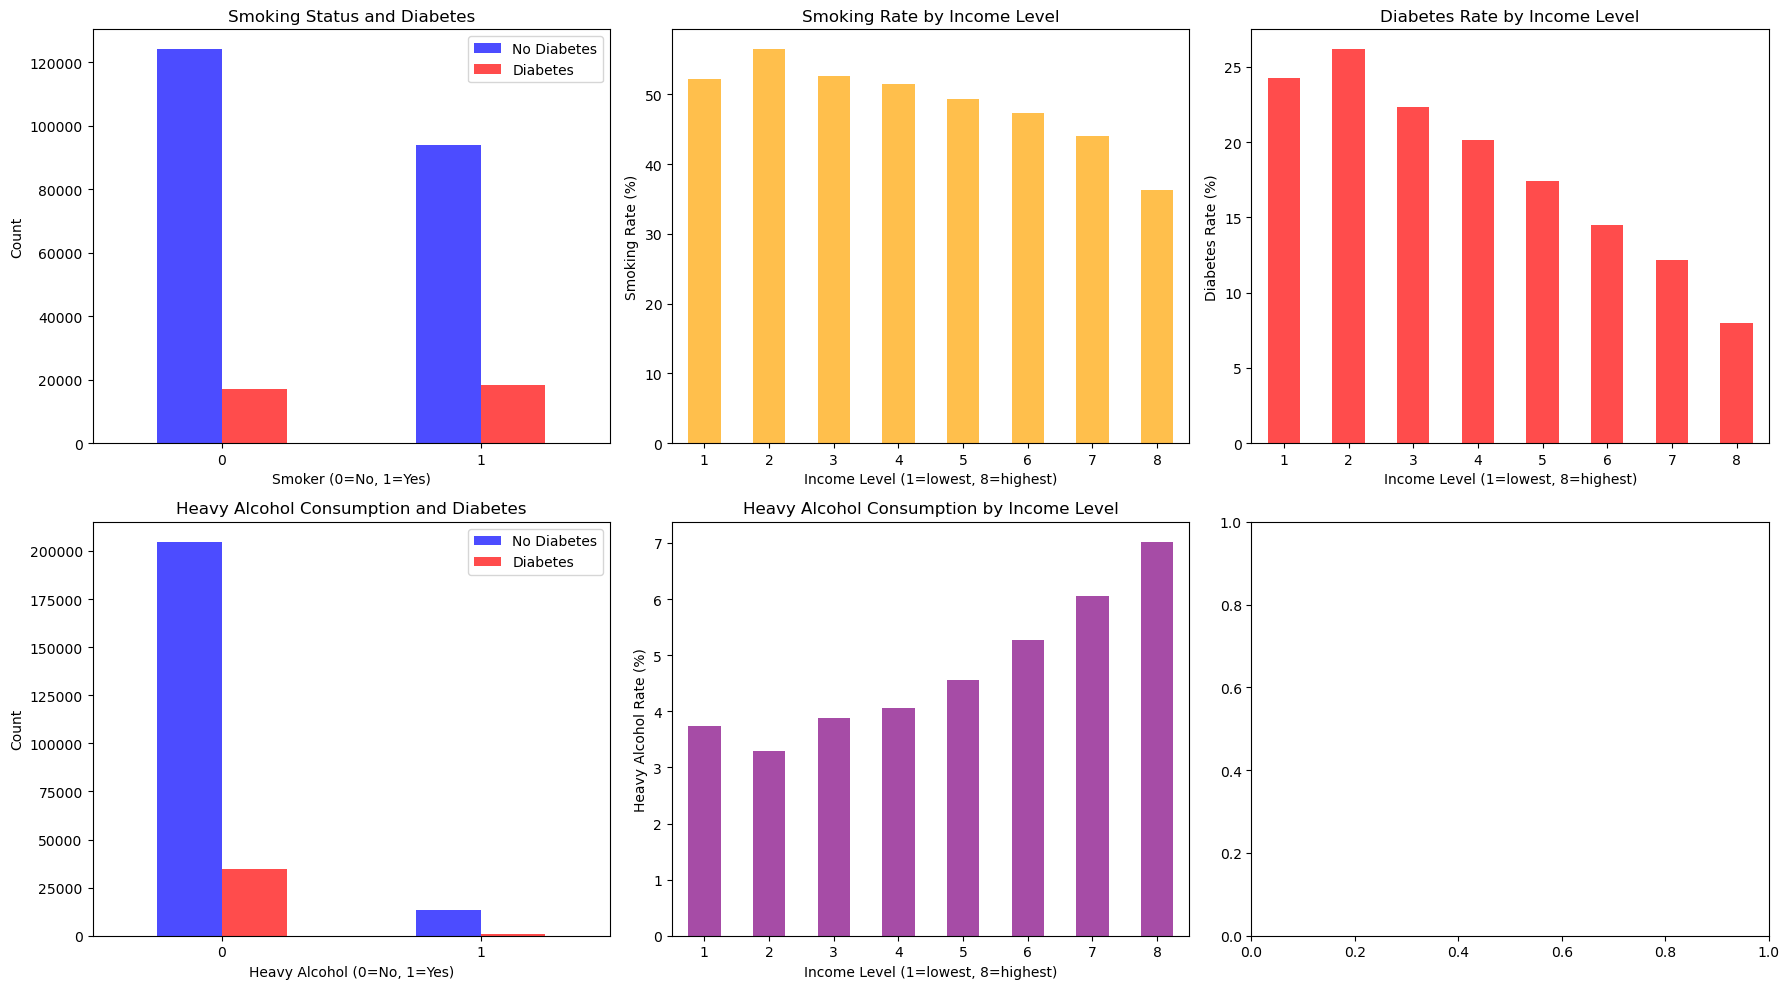

In [26]:
# Visualization: Smoking, Alcohol, and Income Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Smoking vs Diabetes
smoking_data = pd.crosstab(df['Smoker'], df['Diabetes_binary'])
smoking_data.plot(kind='bar', ax=axes[0, 0], color=['blue', 'red'], alpha=0.7)
axes[0, 0].set_xlabel('Smoker (0=No, 1=Yes)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Smoking Status and Diabetes')
axes[0, 0].legend(['No Diabetes', 'Diabetes'])
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Heavy Alcohol vs Diabetes
alcohol_data = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'])
alcohol_data.plot(kind='bar', ax=axes[1, 0], color=['blue', 'red'], alpha=0.7)
axes[1, 0].set_xlabel('Heavy Alcohol (0=No, 1=Yes)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Heavy Alcohol Consumption and Diabetes')
axes[1, 0].legend(['No Diabetes', 'Diabetes'])
axes[1, 0].tick_params(axis='x', rotation=0)

# 3. Smoking Rate by Income Level
smoking_income = df.groupby('Income')['Smoker'].mean() * 100
smoking_income.plot(kind='bar', ax=axes[0, 1], color='orange', alpha=0.7)
axes[0, 1].set_xlabel('Income Level (1=lowest, 8=highest)')
axes[0, 1].set_ylabel('Smoking Rate (%)')
axes[0, 1].set_title('Smoking Rate by Income Level')
axes[0, 1].tick_params(axis='x', rotation=0)

# 4. Heavy Alcohol by Income Level
alcohol_income = df.groupby('Income')['HvyAlcoholConsump'].mean() * 100
alcohol_income.plot(kind='bar', ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Income Level (1=lowest, 8=highest)')
axes[1, 1].set_ylabel('Heavy Alcohol Rate (%)')
axes[1, 1].set_title('Heavy Alcohol Consumption by Income Level')
axes[1, 1].tick_params(axis='x', rotation=0)

# 5. Diabetes Rate by Income Level
diabetes_income = df.groupby('Income')['Diabetes_binary'].mean() * 100
diabetes_income.plot(kind='bar', ax=axes[0, 2], color='red', alpha=0.7)
axes[0, 2].set_xlabel('Income Level (1=lowest, 8=highest)')
axes[0, 2].set_ylabel('Diabetes Rate (%)')
axes[0, 2].set_title('Diabetes Rate by Income Level')
axes[0, 2].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# Stratified Analysis: Smoking/Alcohol by Income Level
print("Stratified analysis: smoking/alcohol and diabetes by income level")
print("="*60)

# Analyze by individual income levels
print("\n1. Smoking and Diabetes by income level:")
print("="*60)

smoking_income_results = []
for income_level in range(1, 9):
    income_cdc_diabetes_health_indicators = df[df['Income'] == income_level]
    
    # Diabetes rate among smokers vs non-smokers
    smokers_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    
    # Chi-square test
    smoking_cont = pd.crosstab(income_cdc_diabetes_health_indicators['Smoker'], income_cdc_diabetes_health_indicators['Diabetes_binary'])
    if smoking_cont.shape == (2, 2):  # Ensure 2x2 table
        chi2, p_val, _, _ = chi2_contingency(smoking_cont)
        
        # Odds ratio
        if (smoking_cont.iloc[1, 0] > 0 and smoking_cont.iloc[0, 0] > 0):
            or_val = (smoking_cont.iloc[1, 1] / smoking_cont.iloc[1, 0]) / (smoking_cont.iloc[0, 1] / smoking_cont.iloc[0, 0])
        else:
            or_val = np.nan
    else:
        chi2, p_val, or_val = np.nan, np.nan, np.nan
    
    smoking_income_results.append({
        'Income': income_level,
        'Smokers_Rate': smokers_rate,
        'Non_Smokers_Rate': non_smokers_rate,
        'OR': or_val,
        'p_value': p_val
    })
    
    print(f"\nIncome Level {income_level}:")
    print(f"   Diabetes rate (Smokers): {smokers_rate:.2f}%")
    print(f"   Diabetes rate (Non-smokers): {non_smokers_rate:.2f}%")
    if not np.isnan(or_val):
        print(f"   Odds Ratio: {or_val:.3f}")
        print(f"   p-value: {p_val:.3e}, Significant: {'YES' if p_val < 0.05 else 'NO'}")

print("\n" + "="*60)
print("\n2. Heavy alcohol and diabetes by income level:")
print("="*60)

alcohol_income_results = []
for income_level in range(1, 9):
    income_cdc_diabetes_health_indicators = df[df['Income'] == income_level]
    
    # Diabetes rate among heavy drinkers vs non-heavy drinkers
    heavy_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['HvyAlcoholConsump'] == 1]['Diabetes_binary'].mean()) * 100
    non_heavy_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['HvyAlcoholConsump'] == 0]['Diabetes_binary'].mean()) * 100
    
    # Chi-square test
    alcohol_cont = pd.crosstab(income_cdc_diabetes_health_indicators['HvyAlcoholConsump'], income_cdc_diabetes_health_indicators['Diabetes_binary'])
    if alcohol_cont.shape == (2, 2):
        chi2, p_val, _, _ = chi2_contingency(alcohol_cont)
        
        # Odds ratio
        if (alcohol_cont.iloc[1, 0] > 0 and alcohol_cont.iloc[0, 0] > 0):
            or_val = (alcohol_cont.iloc[1, 1] / alcohol_cont.iloc[1, 0]) / (alcohol_cont.iloc[0, 1] / alcohol_cont.iloc[0, 0])
        else:
            or_val = np.nan
    else:
        chi2, p_val, or_val = np.nan, np.nan, np.nan
    
    alcohol_income_results.append({
        'Income': income_level,
        'Heavy_Rate': heavy_rate,
        'Non_Heavy_Rate': non_heavy_rate,
        'OR': or_val,
        'p_value': p_val
    })
    
    print(f"\nIncome Level {income_level}:")
    print(f"   Diabetes rate (Heavy drinkers): {heavy_rate:.2f}%")
    print(f"   Diabetes rate (Non-heavy drinkers): {non_heavy_rate:.2f}%")
    if not np.isnan(or_val):
        print(f"   Odds Ratio: {or_val:.3f}")
        print(f"   p-value: {p_val:.3e}, Significant: {'YES' if p_val < 0.05 else 'NO'}")

Stratified analysis: smoking/alcohol and diabetes by income level

1. Smoking and Diabetes by income level:

Income Level 1:
   Diabetes rate (Smokers): 24.44%
   Diabetes rate (Non-smokers): 24.12%
   Odds Ratio: 1.018
   p-value: 7.288e-01, Significant: NO

Income Level 2:
   Diabetes rate (Smokers): 26.70%
   Diabetes rate (Non-smokers): 25.53%
   Odds Ratio: 1.063
   p-value: 1.564e-01, Significant: NO

Income Level 3:
   Diabetes rate (Smokers): 22.91%
   Diabetes rate (Non-smokers): 21.64%
   Odds Ratio: 1.077
   p-value: 5.486e-02, Significant: NO

Income Level 4:
   Diabetes rate (Smokers): 21.24%
   Diabetes rate (Non-smokers): 18.96%
   Odds Ratio: 1.152
   p-value: 6.293e-05, Significant: YES

Income Level 5:
   Diabetes rate (Smokers): 18.98%
   Diabetes rate (Non-smokers): 15.87%
   Odds Ratio: 1.242
   p-value: 4.578e-11, Significant: YES

Income Level 6:
   Diabetes rate (Smokers): 16.14%
   Diabetes rate (Non-smokers): 13.05%
   Odds Ratio: 1.282
   p-value: 7.124e-17, 

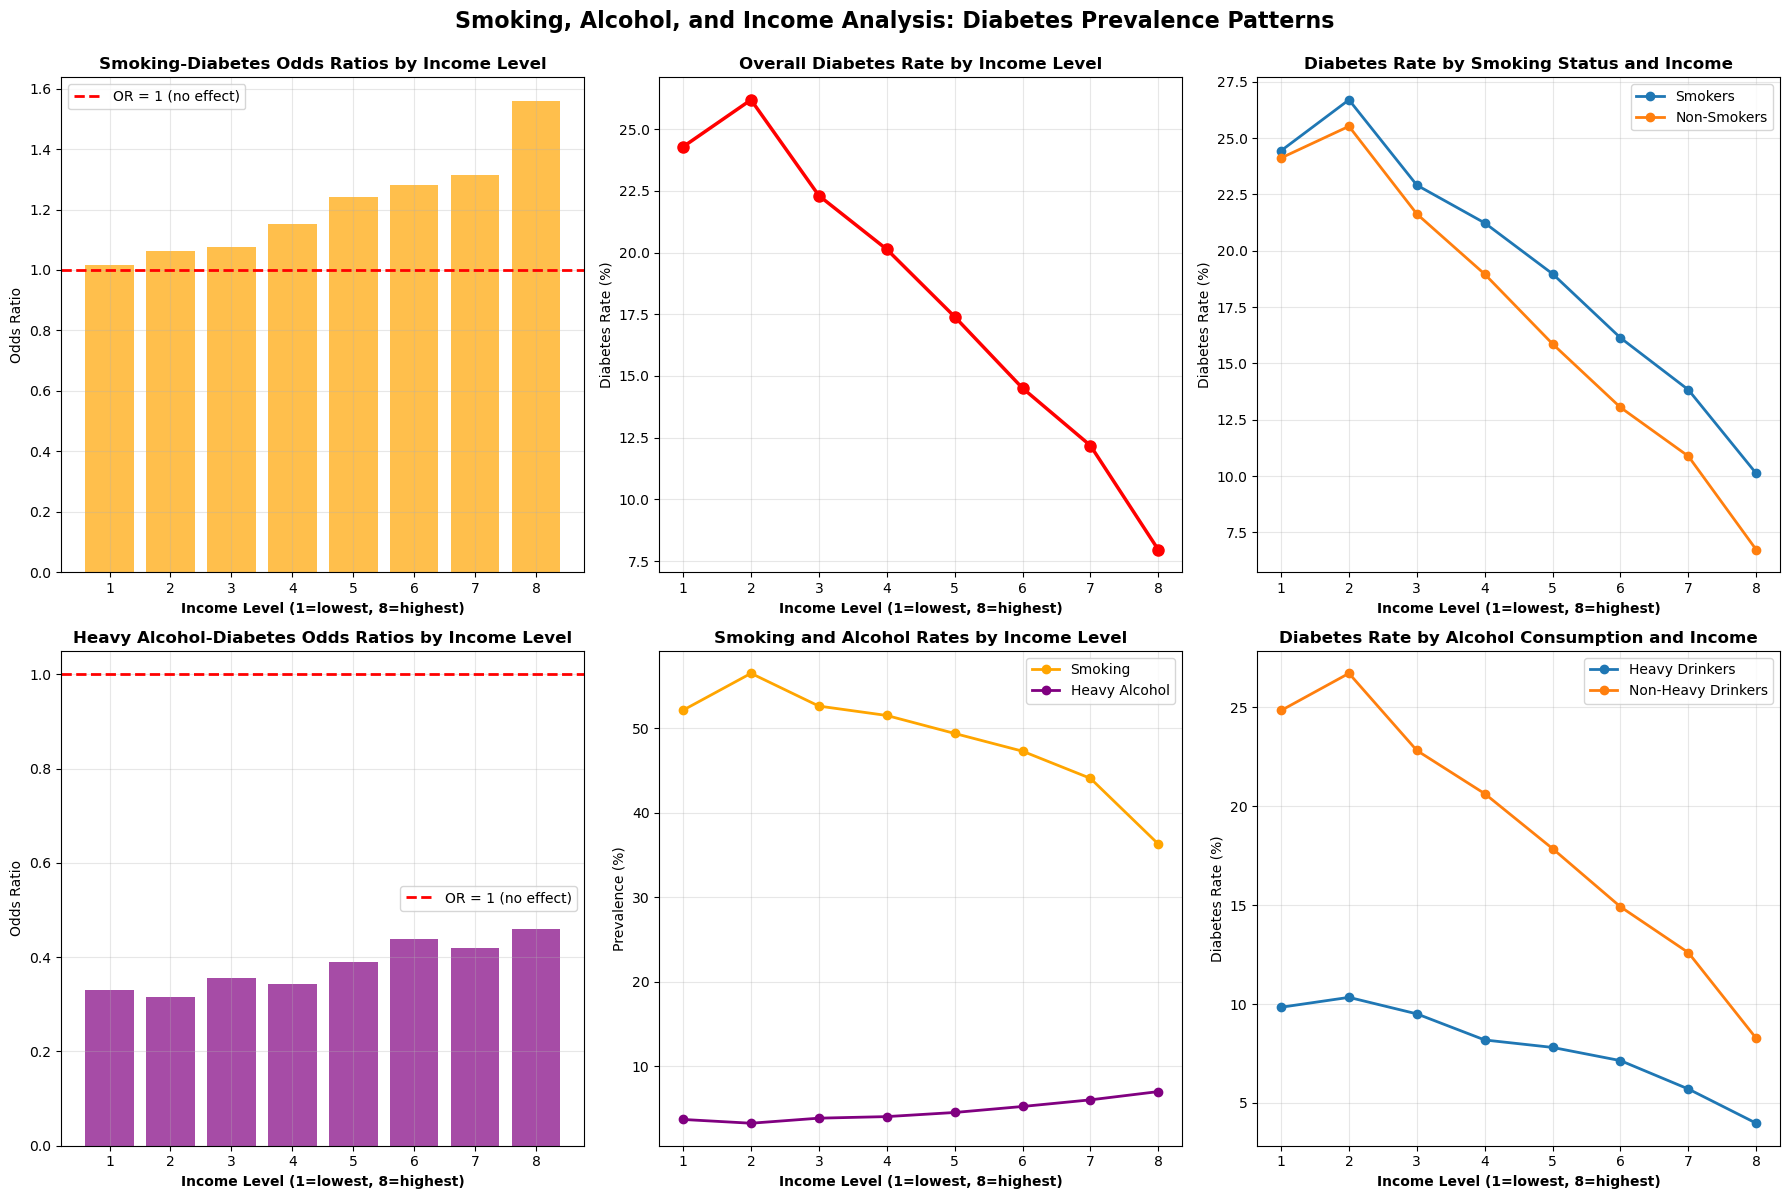

In [30]:
# Visualization: Stratified Analysis (Income Focus)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Odds Ratios for Smoking by Income Level
smoking_or_df = pd.DataFrame(smoking_income_results)
smoking_or_df = smoking_or_df.dropna(subset=['OR'])
axes[0, 0].bar(smoking_or_df['Income'], smoking_or_df['OR'], color='orange', alpha=0.7)
axes[0, 0].axhline(y=1, color='red', linestyle='--', linewidth=2, label='OR = 1 (no effect)')
axes[0, 0].set_xlabel('Income Level (1=lowest, 8=highest)', fontweight='bold')
axes[0, 0].set_ylabel('Odds Ratio')
axes[0, 0].set_title('Smoking-Diabetes Odds Ratios by Income Level', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Odds Ratios for Heavy Alcohol by Income Level
alcohol_or_df = pd.DataFrame(alcohol_income_results)
alcohol_or_df = alcohol_or_df.dropna(subset=['OR'])
axes[1, 0].bar(alcohol_or_df['Income'], alcohol_or_df['OR'], color='purple', alpha=0.7)
axes[1, 0].axhline(y=1, color='red', linestyle='--', linewidth=2, label='OR = 1 (no effect)')
axes[1, 0].set_xlabel('Income Level (1=lowest, 8=highest)', fontweight='bold')
axes[1, 0].set_ylabel('Odds Ratio')
axes[1, 0].set_title('Heavy Alcohol-Diabetes Odds Ratios by Income Level', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 3. Income Level vs Diabetes Rate
income_diabetes_rate = df.groupby('Income')['Diabetes_binary'].mean() * 100
income_diabetes_rate.plot(kind='line', ax=axes[0, 1], marker='o', color='red', linewidth=2.5, markersize=8)
axes[0, 1].set_xlabel('Income Level (1=lowest, 8=highest)', fontweight='bold')
axes[0, 1].set_ylabel('Diabetes Rate (%)')
axes[0, 1].set_title('Overall Diabetes Rate by Income Level', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 4. Smoking and Alcohol Rates by Income Level
income_behaviors = df.groupby('Income')[['Smoker', 'HvyAlcoholConsump']].mean() * 100
income_behaviors.plot(kind='line', ax=axes[1, 1], marker='o', linewidth=2, color=['orange', 'purple'])
axes[1, 1].set_xlabel('Income Level (1=lowest, 8=highest)', fontweight='bold')
axes[1, 1].set_ylabel('Prevalence (%)')
axes[1, 1].set_title('Smoking and Alcohol Rates by Income Level', fontweight='bold')
axes[1, 1].legend(['Smoking', 'Heavy Alcohol'])
axes[1, 1].grid(True, alpha=0.3)

# 5. Diabetes Rate: Smokers vs Non-smokers by Income
income_smoking_data = []
for income_level in range(1, 9):
    income_df = df[df['Income'] == income_level]
    smokers_rate = (income_df[income_df['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (income_df[income_df['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    income_smoking_data.append({'Income': income_level, 'Smokers': smokers_rate, 'Non-Smokers': non_smokers_rate})

income_smoking_df = pd.DataFrame(income_smoking_data)
income_smoking_df.plot(x='Income', y=['Smokers', 'Non-Smokers'], kind='line', ax=axes[0, 2], marker='o', linewidth=2)
axes[0, 2].set_xlabel('Income Level (1=lowest, 8=highest)', fontweight='bold')
axes[0, 2].set_ylabel('Diabetes Rate (%)')
axes[0, 2].set_title('Diabetes Rate by Smoking Status and Income', fontweight='bold')
axes[0, 2].legend(['Smokers', 'Non-Smokers'])
axes[0, 2].grid(True, alpha=0.3)

# 6. Diabetes Rate: Heavy Drinkers vs Non-Heavy by Income
income_alcohol_data = []
for income_level in range(1, 9):
    income_df = df[df['Income'] == income_level]
    heavy_rate = (income_df[income_df['HvyAlcoholConsump'] == 1]['Diabetes_binary'].mean()) * 100
    non_heavy_rate = (income_df[income_df['HvyAlcoholConsump'] == 0]['Diabetes_binary'].mean()) * 100
    income_alcohol_data.append({'Income': income_level, 'Heavy Drinkers': heavy_rate, 'Non-Heavy': non_heavy_rate})

income_alcohol_df = pd.DataFrame(income_alcohol_data)
income_alcohol_df.plot(x='Income', y=['Heavy Drinkers', 'Non-Heavy'], kind='line', ax=axes[1, 2], marker='o', linewidth=2)
axes[1, 2].set_xlabel('Income Level (1=lowest, 8=highest)', fontweight='bold')
axes[1, 2].set_ylabel('Diabetes Rate (%)')
axes[1, 2].set_title('Diabetes Rate by Alcohol Consumption and Income', fontweight='bold')
axes[1, 2].legend(['Heavy Drinkers', 'Non-Heavy Drinkers'])
axes[1, 2].grid(True, alpha=0.3)

fig.suptitle('Smoking, Alcohol, and Income Analysis: Diabetes Prevalence Patterns', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


#### Written Analysis - Question 4

**Answer:** All three lifestyle factors show significant associations with diabetes prevalence:

**1. Smoking:**
- Smokers: 16.29% diabetes rate
- Non-smokers: 12.06% diabetes rate
- **1.35x increased risk** (35% higher)
- Chi-square: highly significant (p < 0.0001)


**2. Heavy Alcohol:**
- Shows apparent "protective" effect (lower diabetes in heavy drinkers)
- **Likely spurious** due to reverse causation and confounding
- People may quit drinking after diabetes diagnosis

**3. Income Level:**
- Strong inverse relationship: diabetes decreases as income increases
- Lowest income (1): ~24.29% prevalence
- Highest income (8): ~7.96% prevalence
- **~3x higher risk** in lowest vs highest income groups
- Consistent downward trend across all income levels

**Key Patterns:**
- Smoking shows consistent association with higher diabetes rates
- Smoking is more prevalent in lower income groups while the opposite is true for high alcohol consumption.
- People with lower income have higher smoking rates and higher diabetes prevalence, indicating clustering of risk factors.

**Practical Implications:**
- Smoking cessation programs should emphasize diabetes prevention
- Income reflects multiple pathways: nutrition access, healthcare, stress, built environment
- Diabetes is a health equity issue requiring structural interventions beyond individual behavior

**Surprises:**
- Alcohol "protective" effect contradicts biology → likely measurement artifact
- Smoking effect smaller than expected (1.35x vs 2.62x for obesity)
- Strong clustering of risk behaviors in lower-income populations

**Limitations:**
- Snapshot study prevents proving causation
- Self-report bias (underreporting of smoking/alcohol)
- Unmeasured confounders (genetics, mental health, detailed diet, medications)
- Alcohol measurement doesn't capture drinking patterns or duration
- Analysis doesn't control for all potential confounding factors like BMI and physical activity